The purpose of the model built here is to predict the severity of a car crash given the circumstances. It will be useful for people to know how severe a crash might be for them if they get in one.

In [76]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

Get the data into a pandas dataframe here

In [77]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory = False)

Call head() to look at what we are dealing with. I can already see some variables we can not include in our model from just looking at this. We don't need any of the descriptions because they are the same thing as the codes.

In [78]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Seeing how many null values there are in each column will aid in deciding which variables need to go. A variable like PEDROWNOTGRNT can be dropped because almost all of the observations have aa null value for that column. We can use this to decide what columns are not even worth keeping because they are the equivalent of not even having the column at all.

In [79]:
df.columns
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

I was interested to see what the relationship between PERSONCOUNT and VEHCOUNT was. After grouping by each other, I decided to do a scatter plot to get a visual. It really exposed the fact that it didn't take a lot of vehicles to affect a bunch of people. 

In [80]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.groupby(['PERSONCOUNT', 'VEHCOUNT']).size()

PERSONCOUNT  VEHCOUNT
0            0                8
             1              771
             2             4267
             3              390
             4               80
             5               19
             6                5
             7                2
             9                1
             11               1
1            0             1530
             1            11444
             2              155
             3               18
             4                6
             5                1
2            0             2920
             1            10961
             2           100339
             3               10
             4                1
3            0              412
             1             1849
             2            25674
             3             7618
4            0              215
             1              477
             2             9909
             3             2646
             4             1413
5            1    

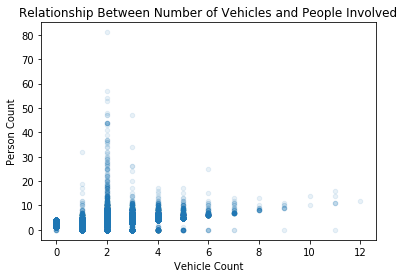

In [81]:
df.plot(kind = 'scatter', x = 'VEHCOUNT', y = 'PERSONCOUNT', alpha=.1)
plt.title("Relationship Between Number of Vehicles and People Involved")
plt.xlabel("Vehicle Count")
plt.ylabel("Person Count")
plt.show()

This is another thing I did to just get a taste of how concentrated the values are in the 2 vehicle range. I discovered that 2 standard deviations above for PERSONCOUNT was approximately 5.134 people and 2 standard deviations above for vehicle count was 3.18. I decided to drop observations that were considered outliers by this definition to reduce noise. I also got rid of observations that had involved 0 people or 0 vehicles cause that makes no sense.

In [126]:
print(df['PERSONCOUNT'].mean())
print(df['PERSONCOUNT'].std())

print(df['VEHCOUNT'].mean())
print(df['VEHCOUNT'].std())

2.228197602109348
0.6704908069360457
1.8462079001044724
0.3607504666646949


In [ ]:
print(df[df['PERSONCOUNT'] == 0].count())
print(df[df['VEHCOUNT'] == 0].count())

I was just wondering about the relationship between COLLISIONTYPE and ROADCOND here.

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.groupby(['COLLISIONTYPE', 'ROADCOND']).size()

The actual dropping is here and after cleaning it up the df looks good.

In [82]:
df.drop(df[df['PERSONCOUNT'] >= 5].index, inplace = True) 
df.drop(df[df['VEHCOUNT'] >= 3].index, inplace = True) 

df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 
         'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 
         'ST_COLDESC', 'SDOT_COLDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'INTKEY', 'SPEEDING', 
         'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'STATUS', 'LOCATION', 'SDOTCOLNUM', 'INCDTTM',
        'JUNCTIONTYPE', 'WEATHER', 'PEDCOUNT', 'PEDCYLCOUNT', 'ST_COLCODE', 'SDOT_COLCODE',
        'UNDERINFL', "HITPARKEDCAR"], axis=1, inplace=True)

df.drop(df[df['PERSONCOUNT'] == 0].index, inplace = True)
df.drop(df[df['VEHCOUNT'] == 0].index, inplace = True)

In [83]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,2,Wet,Daylight
1,1,Block,Sideswipe,2,2,Wet,Dark - Street Lights On
4,2,Intersection,Angles,2,2,Wet,Daylight
5,1,Intersection,Angles,2,2,Dry,Daylight
6,1,Intersection,Angles,2,2,Wet,Daylight


Making sure there is no multicollinearity between the numerical variables.

In [84]:
df.corr()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.128745,-0.249046
PERSONCOUNT,0.128745,1.000000,0.367250
VEHCOUNT,-0.249046,0.367250,1.000000


The way I decided to deal with null values for my chosen features was to just impute the mode of the respective column. So I found the mode doing the below cell and then imputed by the next cell.

In [85]:
print(df['ADDRTYPE'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())
print(df['COLLISIONTYPE'].value_counts())

Block           103803
Intersection     54572
Alley              701
Name: ADDRTYPE, dtype: int64
Dry               103941
Wet                39919
Unknown            14575
Ice                 1046
Snow/Slush           870
Other                117
Standing Water       102
Sand/Mud/Dirt         68
Oil                   56
Name: ROADCOND, dtype: int64
Daylight                    97466
Dark - Street Lights On     40362
Unknown                     12985
Dusk                         5019
Dawn                         2161
Dark - No Street Lights      1300
Dark - Street Lights Off     1049
Other                         209
Dark - Unknown Lighting        11
Name: LIGHTCOND, dtype: int64
Parked Car    41467
Angles        29018
Rear Ended    25221
Other         21929
Sideswipe     16000
Left Turn     11700
Pedestrian     6283
Cycles         4952
Right Turn     2569
Head On        1649
Name: COLLISIONTYPE, dtype: int64


In [86]:
# Dealing with missing values by just putting the mode of each column in for missing values
# Preferably would have liked to experiment a little with knn to fill in missing values
df['ADDRTYPE'] = df['ADDRTYPE'].fillna('Block')
df['ROADCOND'] = df['ROADCOND'].fillna('Dry')
df['LIGHTCOND'] = df['LIGHTCOND'].fillna('Daylight')
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna('Parked Car')

Now we have no null values in the data we are using.

In [87]:
df.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
VEHCOUNT         0
ROADCOND         0
LIGHTCOND        0
dtype: int64

In [88]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,2,Wet,Daylight
1,1,Block,Sideswipe,2,2,Wet,Dark - Street Lights On
4,2,Intersection,Angles,2,2,Wet,Daylight
5,1,Intersection,Angles,2,2,Dry,Daylight
6,1,Intersection,Angles,2,2,Wet,Daylight


I figured that it would probably be better to have a variable that measures the vehicle per person ratio. I thought this was more informative than total people affected and total vehicles involved since the scatter plot above showed that it wasn't necessarily the case that you needed a lot of vehicles to affect a lot of people.

In [89]:
#New Feature Vehicle per person
df["veh_per_pep"] = df['VEHCOUNT']//df['PERSONCOUNT']

#One-hot encoding
chosen_features = df[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'ROADCOND', 'LIGHTCOND']]
chosen_features = pd.concat([chosen_features, pd.get_dummies(df['ADDRTYPE']), 
                             pd.get_dummies(df['COLLISIONTYPE']), 
                             pd.get_dummies(df['ROADCOND']), 
                             pd.get_dummies(df['LIGHTCOND']),
                             df["veh_per_pep"]], axis=1)
chosen_features.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,veh_per_pep
0,Intersection,Angles,2,2,Wet,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,Block,Sideswipe,2,2,Wet,Dark - Street Lights On,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,Intersection,Angles,2,2,Wet,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
5,Intersection,Angles,2,2,Dry,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,Intersection,Angles,2,2,Wet,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


We can look at the X and y variables to make sure they aare what we think they are.

In [90]:
X = chosen_features
X[0:5]

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,veh_per_pep
0,Intersection,Angles,2,2,Wet,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,Block,Sideswipe,2,2,Wet,Dark - Street Lights On,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,Intersection,Angles,2,2,Wet,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
5,Intersection,Angles,2,2,Dry,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,Intersection,Angles,2,2,Wet,Daylight,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [91]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 2, 1, 1])

I drop these variables since we are using the encoded versions of the categorical variables and the newly created feature for PERSONCOUNT and VEHCOUNT. I plot a correlation matrix for X to make sure there isn't multicollinearity between any of the variables.

In [92]:
X.drop(['ADDRTYPE', 'COLLISIONTYPE', 'ROADCOND', 'LIGHTCOND', 'PERSONCOUNT', 'VEHCOUNT'], axis=1, inplace=True)
X.corr()

,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,veh_per_pep
Alley,1.000000,-0.091431,-0.047425,-0.018040,-0.007970,-0.002050,-0.018535,0.048521,0.026352,0.004682,-0.026202,-0.008431,-0.017264,0.000079,-0.000657,-0.001235,-0.001785,0.035369,-0.002307,-0.001667,0.013633,-0.010055,0.043569,0.012226,-0.005213,-0.000547,-0.002804,-0.012169,-0.002648,0.000233,0.015035,0.021544
Block,-0.091431,1.000000,-0.990355,-0.484962,-0.087679,0.024407,-0.294212,0.143738,0.384328,-0.160242,0.192446,-0.061610,0.089912,-0.055377,0.029730,0.005788,0.008359,0.001511,0.021604,0.008872,0.157877,-0.054223,0.018545,0.004158,-0.001986,-0.000347,-0.006734,-0.084209,-0.007294,0.014114,0.152400,0.192635
Intersection,-0.047425,-0.990355,1.000000,0.488964,0.089058,-0.024197,0.297696,-0.150931,-0.389177,0.160083,-0.189392,0.062973,-0.087787,0.055536,-0.029730,-0.005634,-0.008137,-0.006437,-0.021350,-0.008667,-0.160259,0.055789,-0.024664,-0.005871,0.002717,0.000424,0.007145,0.086162,0.007685,-0.014190,-0.154961,-0.196225
Angles,-0.018040,-0.484962,0.488964,1.000000,-0.083641,-0.047763,-0.131442,-0.186459,-0.276688,-0.094619,-0.202379,-0.059789,-0.155975,0.033911,-0.021474,-0.007025,-0.005465,-0.005719,-0.017193,-0.009253,-0.121555,0.051641,-0.016539,-0.006085,-0.032610,0.000029,-0.002802,0.096827,0.006632,-0.010644,-0.116044,-0.059142
Cycles,-0.007970,-0.087679,0.089058,-0.083641,1.000000,-0.018144,-0.049931,-0.070830,-0.105106,-0.035943,-0.076878,-0.022712,-0.059251,0.057448,-0.012632,-0.003327,-0.003475,-0.000165,-0.011184,-0.000202,-0.041981,-0.031020,-0.004033,-0.001924,-0.034114,0.002878,0.009833,0.049319,0.007958,-0.004432,-0.040939,-0.260038
Head On,-0.002050,0.024407,-0.024197,-0.047763,-0.018144,1.000000,-0.028513,-0.040447,-0.060019,-0.020525,-0.043900,-0.012969,-0.033834,-0.016279,0.040139,0.004717,0.004121,0.000909,0.015213,-0.002564,-0.023535,0.023241,0.005287,0.000186,0.012116,-0.000842,0.004739,0.001013,-0.000166,-0.003672,-0.024277,-0.006345
Left Turn,-0.018535,-0.294212,0.297696,-0.131442,-0.049931,-0.028513,1.000000,-0.111310,-0.165173,-0.056484,-0.120813,-0.035692,-0.093112,0.031022,-0.016411,-0.002662,-0.001343,-0.005761,-0.015111,-0.006106,-0.073174,0.020760,-0.019139,-0.007828,0.010898,-0.002317,0.001824,0.030730,0.011955,-0.005453,-0.071422,-0.038049
Other,0.048521,0.143738,-0.150931,-0.186459,-0.070830,-0.040447,-0.111310,1.000000,-0.234309,-0.080126,-0.171381,-0.050631,-0.132085,-0.024675,0.051475,0.027546,0.020191,0.023557,0.015158,0.030293,-0.084929,0.066248,0.028071,0.014845,0.112419,0.003286,0.017990,-0.065232,-0.006401,0.005784,-0.079994,0.068701
Parked Car,0.026352,0.384328,-0.389177,-0.276688,-0.105106,-0.060019,-0.165173,-0.234309,1.000000,-0.118900,-0.254314,-0.075132,-0.196002,-0.104639,0.010810,-0.007197,-0.000625,-0.000376,0.037695,-0.008081,0.367628,-0.136136,0.033587,0.017367,-0.010261,-0.001440,-0.022530,-0.194351,-0.020995,0.018573,0.368981,0.289481
Pedestrian,0.004682,-0.160242,0.160083,-0.094619,-0.035943,-0.020525,-0.056484,-0.080126,-0.118900,1.000000,-0.086967,-0.025693,-0.067027,0.000163,-0.011126,-0.003764,-0.003061,-0.001025,-0.004809,-0.002531,-0.043873,0.032414,0.000433,0.002796,0.032716,0.006093,0.011028,-0.007476,0.004042,-0.001929,-0.046806,-0.299898


From here I am making a training and a test set and then normalizing the data to use for training.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [94]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 11)

In [95]:
#Data Normalization
X_train_normalized = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_normalized = preprocessing.StandardScaler().fit(X_test).transform(X_test)

I will be testing out 3 different algorithms to see which one predicts severity the best. The three algorithms I am using are KNN, decision tree, and Logistic Regression.

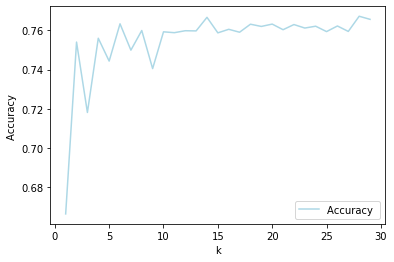

The best accuracy was 0.76725 at k = 28


In [79]:
#KNN

k = 30
accs = np.zeros(k-1)

for i in range(1,k):
    num_neighbors = KNeighborsClassifier(n_neighbors = i).fit(X_train_normalized, y_train)
    pred = num_neighbors.predict(X_test_normalized)
    accs[i-1] = metrics.accuracy_score(y_test, pred)
    
plt.plot(range(1,k), accs,'lightblue')
plt.legend(('Accuracy ',))
plt.ylabel('Accuracy ')
plt.xlabel('k')
plt.show()

print("The best accuracy was", round(accs.max(), 5), "at k =", accs.argmax() + 1) 

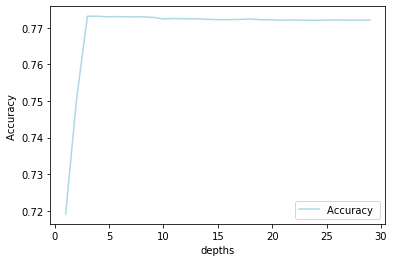

The best accuracy was 0.77312 at depth =  3


In [113]:
#Decision Tree

depths = 30
accuracies = np.zeros(depths-1)

for i in range(1, depths):
    decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    decision_tree.fit(X_train_normalized ,y_train)
    prediction_tree = decision_tree.predict(X_test_normalized)
    accuracies[i-1] = metrics.accuracy_score(y_test, prediction_tree)

plt.plot(range(1, depths), accuracies,'lightblue')
plt.legend(('Accuracy ',))
plt.ylabel('Accuracy ')
plt.xlabel('depths')
plt.show()

print("The best accuracy was", round(accuracies.max(), 5), "at depth = ", accuracies.argmax() + 1)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

params_grid2 = [
  {'C': [.001, .01, .1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty' : ['l2']},
  {'C': [.001, .01, .1, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga'], 'penalty' : ['l1', 'l2']}
 ]

LR = GridSearchCV(LogisticRegression(), params_grid2, cv = 5)
LR.fit(X_train_normalized, y_train)
pred = LR.predict(X_test_normalized)

print("The best parameters are: ", LR.best_params_)

/Users/andrewlin/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/andrewlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/andrewlin/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/andrewlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Users/andrewlin/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/andrewlin/opt/anacon

The best parameters are:  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [99]:
bestLR = LogisticRegression(C = .001, solver = 'liblinear', penalty = 'l1' )
bestLR.fit(X_train_normalized, y_train)
pred = bestLR.predict(X_test_normalized)
sk = round(metrics.accuracy_score(y_test, pred), 5)
print(sk)

0.77315


In [101]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report

This is where we get the evaluation metrics for each of the models deemed the best by our methods above. I will gather the Jaccard, F1-score and LogLoss where appropriate and put the results in a dataframe.

In [102]:
#Models
bestknn = KNeighborsClassifier(n_neighbors = 28).fit(X_train_normalized, y_train)
bestLR = LogisticRegression(C = .001, solver = 'liblinear', penalty = 'l1').fit(X_train_normalized, y_train)
bestdecision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 9).fit(X_train_normalized, y_train)

#Predictions
knn_pred = bestknn.predict(X_test_normalized)
LR_pred = bestLR.predict(X_test_normalized)
dt_pred = bestdecision_tree.predict(X_test_normalized)

#Jaccard
print(round(jaccard_similarity_score(y_test, knn_pred), 2), "knn jaccard")
print(round(jaccard_similarity_score(y_test, LR_pred), 2), "LR jaccard")
print(round(jaccard_similarity_score(y_test, dt_pred), 2), "dt jaccard")

#F1-score
print(round(f1_score(y_test, knn_pred, average='weighted'), 2), "knn f1")
print(round(f1_score(y_test, LR_pred, average='weighted'), 2), "LR f1")
print(round(f1_score(y_test, dt_pred, average='weighted'), 2), "dt f1")

#LogLoss
pred_prob = bestLR.predict_proba(X_test_normalized)
print ("LogLoss: ", round(log_loss(y_test, pred_prob),2))

0.77 knn jaccard
0.77 LR jaccard
0.77 dt jaccard
0.73 knn f1
0.72 LR f1
0.72 dt f1
LogLoss:  0.46


/Users/andrewlin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


This is where I make the dataframe of the evalauation metrics for each algorithm.

In [ ]:
data = [["KNN", 0.77, 0.73, "NA"],["Decision Tree", 0.77, 0.72, "NA"], ["LogisticRegression", 0.77, 0.72, 0.46]]
algo_df = pd.DataFrame(data, columns = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])
algo_df

The below cells are for calcualting confusion matrices and classification reports to gain insight as to how the models performed. It appears that it has trouble predicting accidents with a severity code of 2 correctly.

In [121]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[22591   539]
 [ 6796  2236]]
              precision    recall  f1-score   support

           1       0.77      0.98      0.86     23130
           2       0.81      0.25      0.38      9032

    accuracy                           0.77     32162
   macro avg       0.79      0.61      0.62     32162
weighted avg       0.78      0.77      0.73     32162



In [120]:
print(confusion_matrix(y_test, LR_pred))
print(classification_report(y_test, LR_pred))

[[22764   366]
 [ 6931  2101]]
              precision    recall  f1-score   support

           1       0.77      0.98      0.86     23130
           2       0.85      0.23      0.37      9032

    accuracy                           0.77     32162
   macro avg       0.81      0.61      0.61     32162
weighted avg       0.79      0.77      0.72     32162



In [118]:
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[22867   263]
 [ 7044  1988]]
              precision    recall  f1-score   support

           1       0.76      0.99      0.86     23130
           2       0.88      0.22      0.35      9032

    accuracy                           0.77     32162
   macro avg       0.82      0.60      0.61     32162
weighted avg       0.80      0.77      0.72     32162



Final Model

In [ ]:
best_model = LogisticRegression(C = .001, solver = 'liblinear', penalty = 'l1')